In [132]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import psi4
import v3d

In [133]:
#will use psi4 to compute energies, setting output file and some basic variables. 
psi4.core.set_output_file('angles.dat')
theory = 'mp2/6-31G*'
rad2deg = 180.0/np.pi # convert radian to degree 
psi4.core.set_num_threads(10)

In [134]:
#optimized coordinates of the molecule from a previous calc
azi = """
0 1
    C           -1.372186183321    -2.010860020902    -0.886820192828
    C           -0.173158673000    -1.298344357907    -0.406115006426
    N            0.786309071860    -1.384810968974     0.420697487368
    C            0.662837700048    -0.111043752576    -0.491918176988
    H            1.422532833369    -0.002132476819    -1.261568419806
    C            0.271415655367     1.154529325936     0.168585840901
    O           -0.638034693748     0.950769479245     1.162558403008
    O            0.686902544636     2.258017066085    -0.144478115352
    H           -1.457401352716    -2.978238526949    -0.387585199421
    H           -1.313874303487    -2.157164437091    -1.968871402470
    H           -2.260422649854    -1.409349289546    -0.673788389312
    H           -0.815494634684     1.839688017493     1.533442847642
"""


In [135]:
#what coordinates are we optimizing
coords = [
    (2,  4,  6),
    (2,  4,  3),
    (2,  4,  5),
    (6,  4,  3),
    (6,  4,  5),
    (3,  4,  5),
]

opt_coords = np.zeros(len(coords))
#print the optimized values of these coordinates:
#also, save these values for later
azi_geo = psi4.geometry(azi)

In [136]:
#what coordinates are we optimizing
coords = [
    (2,  4,  6),
    (2,  4,  3),
    (2,  4,  5),
    (6,  4,  3),
    (6,  4,  5),
    (3,  4,  5),
]

opt_coords = np.zeros(len(coords))
#print the optimized values of these coordinates:
#also, save these values for later
azi_geo = psi4.geometry(azi)
for item, trio in enumerate(coords):
    opt_coords[item] = v3d.angle((azi_geo.to_arrays()[0])[trio[0]-1],
                                 (azi_geo.to_arrays()[0])[trio[1]-1],
                                 (azi_geo.to_arrays()[0])[trio[2]-1])*rad2deg
    print(coords[item], opt_coords[item])

opt_energy = psi4.energy(theory)
opt_energy

(2, 4, 6) 121.30244737053357
(2, 4, 3) 49.41653448641351
(2, 4, 5) 121.6855487381018
(6, 4, 3) 117.03585143566147
(6, 4, 5) 114.526848635231
(3, 4, 5) 115.94048230842184


-359.5624813792022

In [137]:
energies = np.genfromtxt('angle_energies.dat')
t_real = np.genfromtxt('angle_thetas.dat')

In [138]:
energies_norm = (energies-opt_energy)*627.503 # 1 Hartree = 627.503 kcal/mol

Text(0, 0.5, 'Energy, kcal/mol')

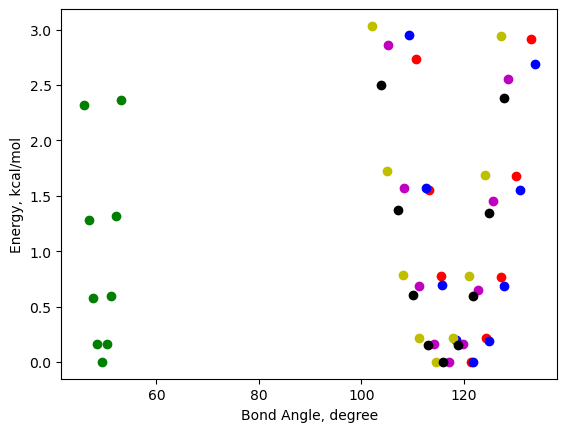

In [139]:
#collected data plots
colors = ['r', 'g', 'b', 'm', 'y', 'k']

for i in range(len(coords)):
    plt.plot(t_real[i], energies_norm[i]-np.min(energies_norm), 'o', color=colors[i]) 
plt.xlabel('Bond Angle, degree')
plt.ylabel('Energy, kcal/mol')

In [140]:
def vbond(t, k, t0):
    return k*((t-t0)/rad2deg)**2

In [141]:
parms = []
                 
for i in range(len(coords)):
    if i != 1:
        parms.append(spo.curve_fit(vbond, 
                               t_real[i], 
                               energies_norm[i]-np.min(energies_norm), 
                               p0=[100, 120]))
    else:
        parms.append(spo.curve_fit(vbond, 
                               t_real[i], 
                               energies_norm[i]-np.min(energies_norm), 
                               p0=[600,50]))


Text(0, 0.5, 'Energy, kcal/mol')

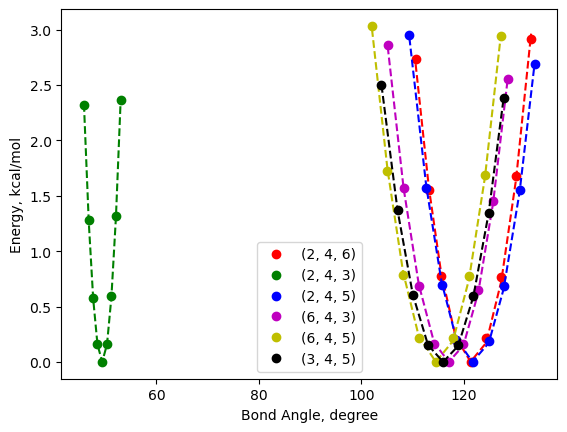

In [142]:
#fitted data plots
colors = ['r', 'g', 'b', 'm', 'y', 'k']

for i in range(len(coords)):
    plt.plot(t_real[i], energies_norm[i]-np.min(energies_norm), 'o', color=colors[i], label=str(coords[i])) 
    plt.plot(t_real[i], vbond(t_real[i], *parms[i][0]), '--', color=colors[i])
plt.legend()
plt.xlabel('Bond Angle, degree')
plt.ylabel('Energy, kcal/mol')


In [143]:
for i in range(len(coords)):
    print('For the angle between atoms ', str(coords[i]))
    print('the force constant is ', str(parms[i][0][0]), '\u00B1', np.sqrt(np.diag(parms[i][1]))[0], 'kcal/mol/rad^2')
    print('and the optimal angle is ', str(parms[i][0][1]), '\u00B1', np.sqrt(np.diag(parms[i][1]))[1], 'degrees')


For the angle between atoms  (2, 4, 6)
the force constant is  73.053955510162 ± 0.6348127415195777 kcal/mol/rad^2
and the optimal angle is  121.57151487311403 ± 0.04198266750259376 degrees
For the angle between atoms  (2, 4, 3)
the force constant is  600.2368698337634 ± 1.7251377519068885 kcal/mol/rad^2
and the optimal angle is  49.42031338555245 ± 0.004412461123711832 degrees
For the angle between atoms  (2, 4, 5)
the force constant is  61.76861827984097 ± 0.3028271276930835 kcal/mol/rad^2
and the optimal angle is  121.83743464699694 ± 0.025737983311820877 degrees
For the angle between atoms  (6, 4, 3)
the force constant is  64.60058617613902 ± 0.22647958996984163 kcal/mol/rad^2
and the optimal angle is  117.16005968536254 ± 0.017696494549058816 degrees
For the angle between atoms  (6, 4, 5)
the force constant is  61.82148851906019 ± 0.3261046731628012 kcal/mol/rad^2
and the optimal angle is  114.69838296169272 ± 0.028504451213978658 degrees
For the angle between atoms  (3, 4, 5)
the 